In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from matplotlib import pyplot
import math
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import linear_model
from scipy.optimize import curve_fit
import mplcursors
from mplcursors import cursor

In [87]:
df = pd.read_csv("tn1.csv")

In [88]:
df

,Seconds,Temp
0,0,-16.102
1,15,-16.020
2,30,-15.828
3,45,-15.617
4,60,-15.406
...,...,...
66,990,-5.364
67,1005,-5.258
68,1020,-5.152
69,1035,-5.093


In [89]:
df['Temperature(K)']=df['Temp'] + 273

In [90]:
df

,Seconds,Temp,Temperature(K)
0,0,-16.102,256.898
1,15,-16.020,256.980
2,30,-15.828,257.172
3,45,-15.617,257.383
4,60,-15.406,257.594
...,...,...,...
66,990,-5.364,267.636
67,1005,-5.258,267.742
68,1020,-5.152,267.848
69,1035,-5.093,267.907


In [91]:
df['T-T(0)']=df['Temperature(K)'] - 256.898

In [93]:
df['log(Seconds)'] = np.log(df['Seconds'])

In [94]:
df

,Seconds,Temp,Temperature(K),T-T(0),log(Seconds)
0,0,-16.102,256.898,0.000,-inf
1,15,-16.020,256.980,0.082,2.708050
2,30,-15.828,257.172,0.274,3.401197
3,45,-15.617,257.383,0.485,3.806662
4,60,-15.406,257.594,0.696,4.094345
...,...,...,...,...,...
66,990,-5.364,267.636,10.738,6.897705
67,1005,-5.258,267.742,10.844,6.912743
68,1020,-5.152,267.848,10.950,6.927558
69,1035,-5.093,267.907,11.009,6.942157


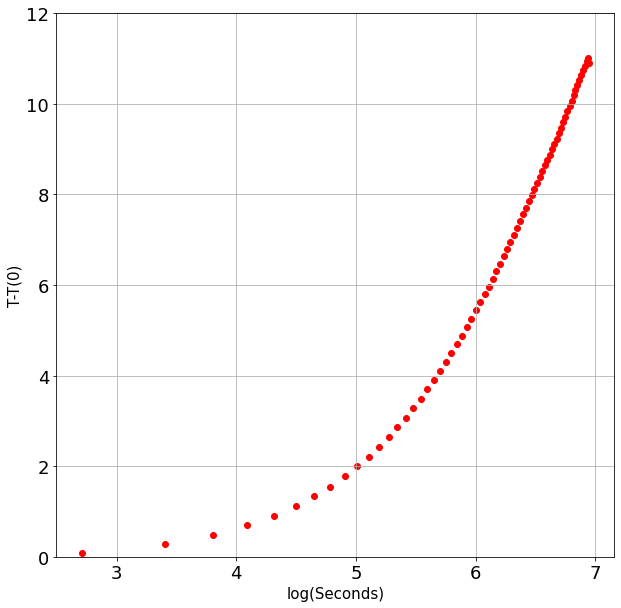

In [95]:
plt.scatter(df['log(Seconds)'],df['T-T(0)'],color='red')
#plt.scatter(df2['log(Seconds)'],df2['T-T(0)'],color='blue')
plt.ylabel('T-T(0)', fontsize = 15)
plt.xlabel('log(Seconds)', fontsize = 15)
plt.ylim(0, 12)
#plt.xlim(0,12)
plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

plt.grid()


In [96]:
df.drop([0], axis=0, inplace=True)

In [97]:
df

,Seconds,Temp,Temperature(K),T-T(0),log(Seconds)
1,15,-16.020,256.980,0.082,2.708050
2,30,-15.828,257.172,0.274,3.401197
3,45,-15.617,257.383,0.485,3.806662
4,60,-15.406,257.594,0.696,4.094345
5,75,-15.193,257.807,0.909,4.317488
...,...,...,...,...,...
66,990,-5.364,267.636,10.738,6.897705
67,1005,-5.258,267.742,10.844,6.912743
68,1020,-5.152,267.848,10.950,6.927558
69,1035,-5.093,267.907,11.009,6.942157


In [31]:
df.to_csv('fit.csv')

In [98]:
df1 = pd.read_csv("fitline.csv")
df2 = pd.read_csv("fitline2.csv")
df4 = pd.read_csv("fitline3.csv")
df3 = pd.read_csv("fitline_data.csv")

In [62]:
df2

,T-T(0),log(Seconds)
0,0.0001,5.200000
1,0.2000,5.388800
2,0.2555,5.300000
3,8.1270,6.492240
4,8.2590,6.514713
5,8.3870,6.536692
6,8.5130,6.558198
7,8.6380,6.579251
8,8.7590,6.599870
9,8.8780,6.620073


In [34]:
df3

,T-T(0),log(Seconds)
0,8.127,6.492240
1,8.259,6.514713
2,8.387,6.536692
3,8.513,6.558198
4,8.638,6.579251
5,8.759,6.599870
6,8.878,6.620073
7,8.996,6.639876
8,9.115,6.659294
9,9.233,6.678342


In [63]:
df4

,T-T(0),log(Seconds)
0,0.0001,5.200000
1,0.2000,5.388800
2,0.2555,5.300000
3,8.1270,6.492240
4,8.2590,6.514713
5,8.3870,6.536692
6,8.5130,6.558198
7,8.6380,6.579251
8,8.7590,6.599870
9,8.8780,6.620073


In [64]:
df1

,T-T(0),log(Seconds)
0,0.0001,5.200000
1,0.2000,5.388800
2,0.2555,5.300000
3,8.1270,6.492240
4,8.2590,6.514713
5,8.3870,6.536692
6,8.5130,6.558198
7,8.6380,6.579251
8,8.7590,6.599870
9,8.8780,6.620073


In [99]:
x=df4['log(Seconds)'].values
y=df4['T-T(0)'].values

# Defining a fitting function
    
#def func(x, a, b, c, d):
    #return a*x**3 + b*x**2 +c*x + d

def func(x, a, b):
    return a*x + b

In [100]:
popt, pcov = curve_fit(func, x, y)

In [101]:
params, covariance = curve_fit(func,x,y)
print('Slope (a) is ', params[0])
print('Intercept (b) is ', params[1])
paramErrors=np.sqrt(np.diag(covariance))
#print(covariance)
print(paramErrors)

Slope (a) is  6.566630141690278
Intercept (b) is  -34.591808436823996
[0.07224275 0.47092919]


In [102]:
print("a = %s , b = %s" % (popt[0], popt[1]))

a = 6.566630141690278 , b = -34.591808436823996


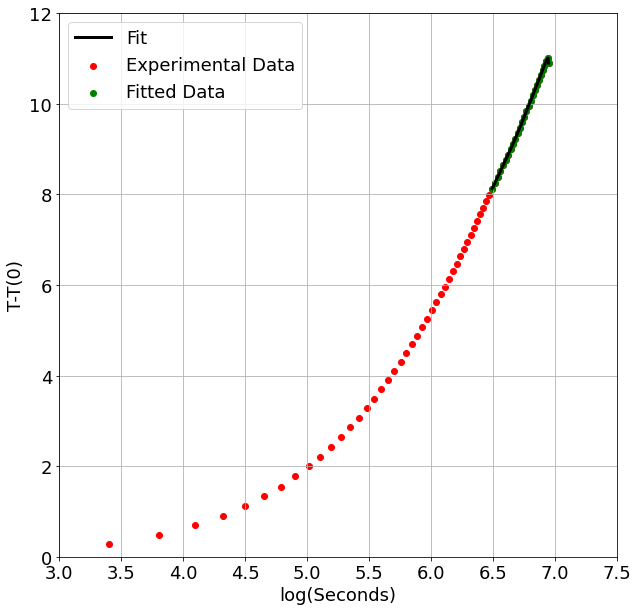

In [86]:
plt.scatter(df['log(Seconds)'],df['T-T(0)'],c='red',label='Experimental Data')
plt.scatter(df3['log(Seconds)'],df3['T-T(0)'],c='green',label='Fitted Data')
plt.xlabel('log(Seconds)',fontsize=18)
plt.ylabel('T-T(0)',fontsize=18)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.plot(x, func(x,popt[0], popt[1]),c='black',lw=3,label='Fit')
#plt.plot(df3['log(Seconds)'], df3['T-T(0)'],c='black',lw=3,label='Fit')
plt.legend(loc='upper left',prop={'size': 18})
plt.ylim(0, 12)
plt.xlim(3,7.5)
#plt.legend()
plt.grid()
plt.show()